In [1]:
import os
import sys
import time
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd

import tensorflow as tf
from tensorflow import keras

# print(tf.__version__)
# print(sys.version_info)
# for module in mpl,np,pd,sklearn,tf,keras:
#     print(module.__name__,module.__version__)

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

import pprint
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5]) 

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state =7)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state = 11)
# print(x_valid.shape,y_valid.shape)
# print(x_train.shape,y_train.shape)
# print(x_test.shape,y_test.shape)
# print(np.max(x_train),np.min(x_train))


In [4]:
# x = (x-u均值)/ std方差
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

print(np.max(x_train_scaled),np.min(x_train_scaled))

81.80221745207753 -2.3594398206242224


In [5]:
# 多输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30,activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_wide,input_deep],
                           outputs = [output])

model.summary()

model.compile(loss="mean_squared_error",
              optimizer="sgd")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [7]:

callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

x_train_scaled_wide = x_train_scaled[:,:5]
x_train_scaled_deep = x_train_scaled[:,2:]
x_valid_scaled_wide = x_valid_scaled[:,:5]
x_valid_scaled_deep = x_valid_scaled[:,2:]

x_test_scaled_wide = x_test_scaled[:,:5]
x_test_scaled_deep = x_test_scaled[:,2:]

history = model.fit([x_train_scaled_wide,x_train_scaled_deep],
                    y_train,
                  epochs = 50,
                  validation_data = ([x_valid_scaled_wide,x_valid_scaled_deep]
                                     ,y_valid),
                  callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5408 - val_loss: 0.4836
Epoch 2/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4485 - val_loss: 0.4801
Epoch 3/50
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4323 - val_loss: 0.4420
Epoch 4/50
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4278 - val_loss: 0.4332
Epoch 5/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4122 - val_loss: 0.4241
Epoch 6/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4214 - val_loss: 0.4212
Epoch 7/50
11610/11610 [==============================] - 1s 72us/sample - loss: 0.3959 - val_loss: 0.4139
Epoch 8/50
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3892 - val_loss: 0.4040
Epoch 9/50
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3921 - val_l

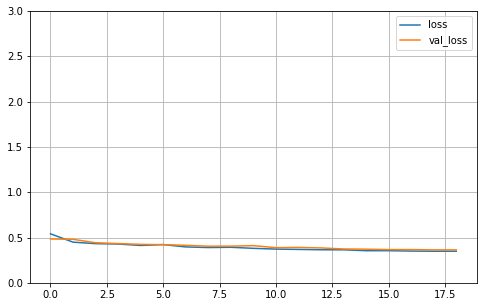

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
    
plot_learning_curves(history)

In [9]:
model.evaluate([x_test_scaled_wide,x_test_scaled_deep],y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.35837100924447524